## <center>Multiple Linear Regression</center>
A multiple linear regression model to predict house prices based on various predictor variables.
### Steps-
1. [Data Visualization](#Data-Visualization)
2. [Data Preparation](#Data-Preparation)
3. [Training](#Training)
4. [Residual Analysis](#Residual-Analysis)
5. [Evaluation](#Evaluation)

<!-- [section title](#section-title) -->

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Data Visualization

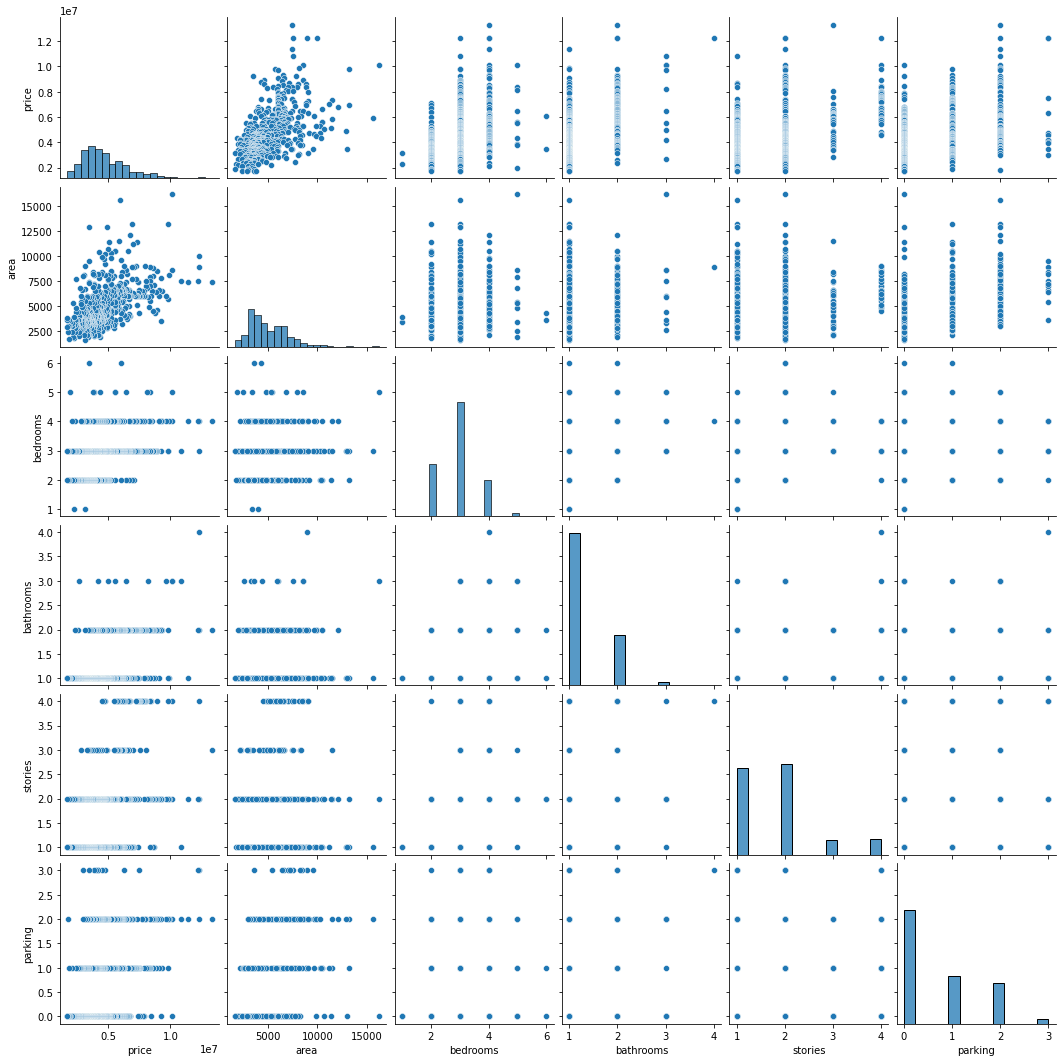

In [6]:
sns.pairplot(df)
plt.show()

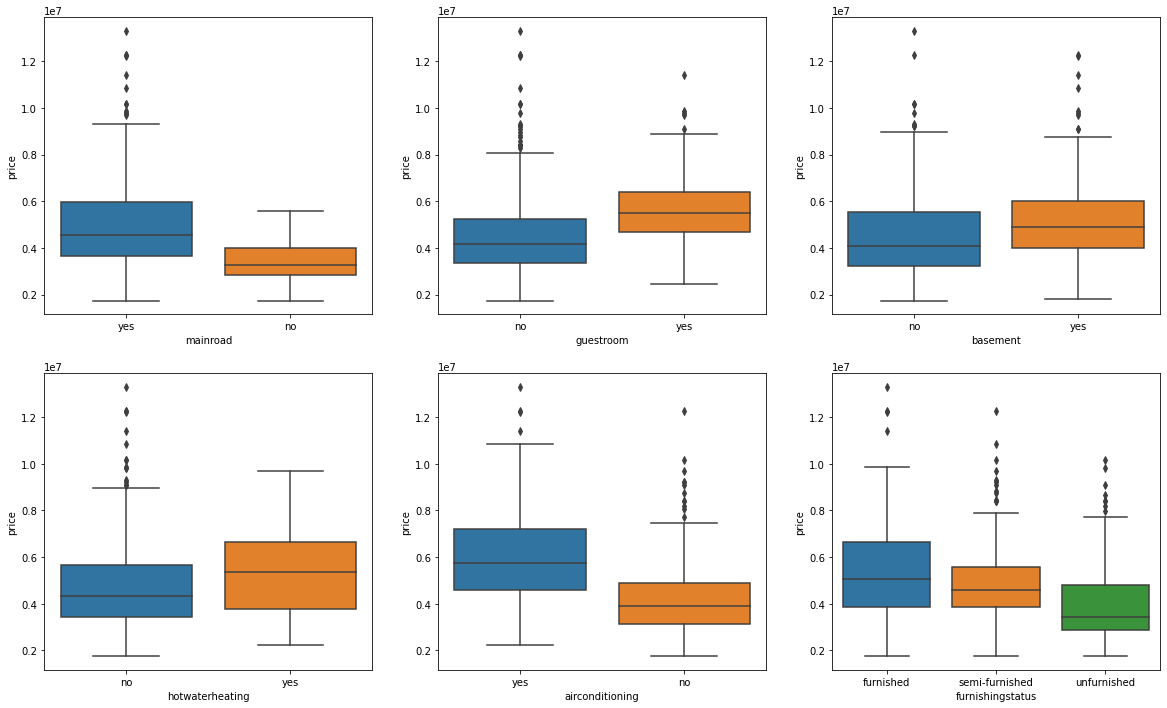

In [7]:
# for categorical variables

plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x="mainroad", y="price", data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x="guestroom", y="price", data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x="basement", y="price", data=df)

plt.subplot(2, 3, 4)
sns.boxplot(x="hotwaterheating", y="price", data=df)

plt.subplot(2, 3, 5)
sns.boxplot(x="airconditioning", y="price", data=df)

plt.subplot(2, 3, 6)
sns.boxplot(x="furnishingstatus", y="price", data=df)

plt.show()

*Conclusion:* Enough variables seems to show a linear relationship with the price<br>
Let's proceed to prepare data for modelling.

#### Data Preparation

- Encoding of categorical variables to dummy variables
- Splitting into train and test
- Normalization

*Encoding*

In [3]:
# binary variables - yes/no to 1/0

cat_vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

df[cat_vars] = df[cat_vars].apply(lambda x : x.map({"yes" : 1, "no" : 0}))

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
# pandas method to create dummy variables

status = pd.get_dummies(df.furnishingstatus, drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [5]:
# concatenating the two dataframes

df = pd.concat((df, status), axis=1)

In [6]:
# removing the original column

df.drop(columns="furnishingstatus", inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


*Train Test Split*

In [7]:
train_df, test_df = train_test_split(df, train_size=0.7, random_state=100)
print(train_df.shape)
print(test_df.shape)

(381, 14)
(164, 14)


*Normalization*

Generally, a class in sklearn is implemented by creating an object and fit/transform/fit_transform on data. <br>
1. fit(): learns mean(x), stddev(x)
2. transform(): x - mean / stddev
3. fit_transform(): does both

In [8]:
# create object
scaler = StandardScaler()

# columns to standardize
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]

# df_train.fit_transform()
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,-0.575831,-0.736734,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,0,0,1
19,2.254239,0.632894,0.092755,1.533738,0.219752,1,0,0,0,1,0.318635,1,1,0
159,0.386778,-0.955291,0.092755,1.533738,-0.911674,1,1,1,0,1,-0.848672,0,0,0
35,1.828458,0.914591,0.092755,1.533738,2.482604,1,0,0,0,1,1.485941,0,0,0
28,2.003961,1.375990,2.811204,1.533738,0.219752,1,0,1,1,0,1.485941,0,0,1


In [9]:
# applying normalization on the test data
# we don't use fit_transform on test data, instead we use transform only because scaler is to be fit on training dataset

test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,-0.194638,-1.086426,0.092755,-0.575844,0.219752,1,0,0,0,0,-0.848672,1,1,0
54,1.426396,0.428907,0.092755,1.533738,0.219752,1,1,0,0,1,0.318635,0,1,0
171,0.271265,2.502291,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,1,1,0
244,-0.113779,0.098642,0.092755,-0.575844,0.219752,1,1,1,0,0,-0.848672,1,1,0
268,-0.206190,-0.081061,1.451980,-0.575844,0.219752,1,0,0,0,1,-0.848672,0,1,0


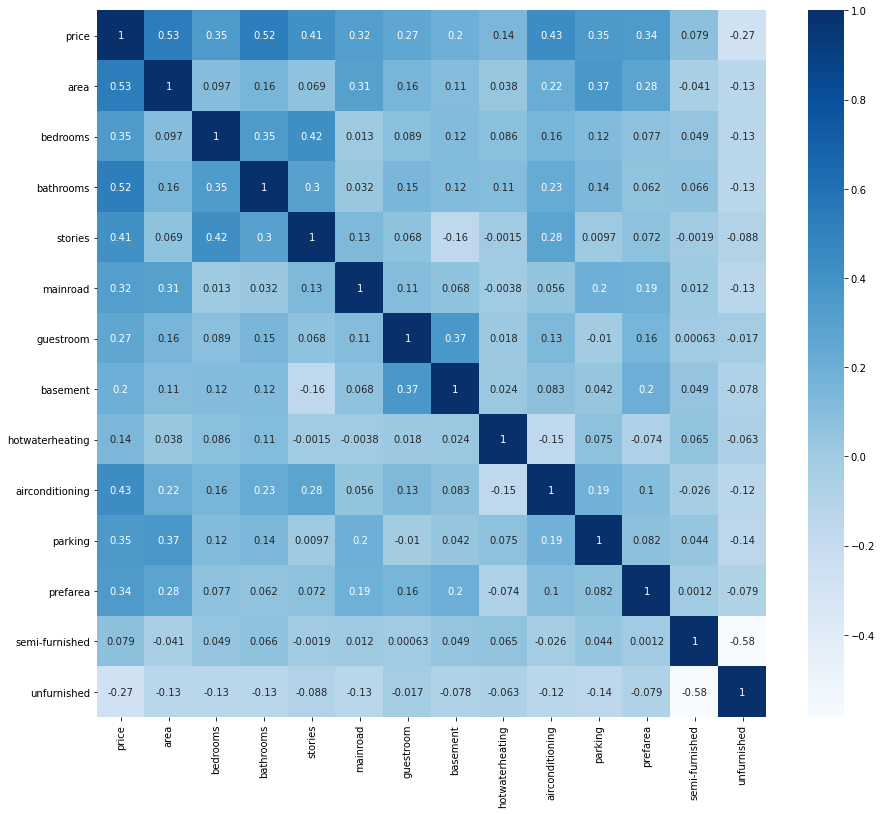

In [10]:
plt.figure(figsize=(15, 13))
sns.heatmap(train_df.corr(), cmap="Blues", annot=True)
plt.show()

#### Training

We will use the following two techniques:-
- start with one variable and keep adding more
- start with all the variables and remove incrementally

We will be checking two things about the variable to decide whether to keep it or not:-
- statistical significance of the variable
- VIF (multicolinearity)

##### Starting with one variable and adding more

In [11]:
# separating the predictors and target

y_train = train_df.pop("price")
X_train = train_df

In [12]:
# starting with area column along with a constant
X_train_sm = sm.add_constant(X_train['area'])

# create first model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const    2.602085e-16
area     5.320245e-01
dtype: float64

In [13]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           3.15e-29
Time:                        16:59:08   Log-Likelihood:                -477.23
No. Observations:                 381   AIC:                             958.5
Df Residuals:                     379   BIC:                             966.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.602e-16      0.043   5.98e-15      1.000      -0.086       0.086
area           0.5320      0.043     12.232      0.000       0.447       0.618
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Add another variable

X_train_sm = X_train[["area", "bathrooms"]]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        2.602085e-16
area         4.585896e-01
bathrooms    4.492919e-01
dtype: float64

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.51e-54
Time:                        16:59:20   Log-Likelihood:                -416.22
No. Observations:                 381   AIC:                             838.4
Df Residuals:                     378   BIC:                             850.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.602e-16      0.037   7.01e-15      1.000      -0.073       0.073
area           0.4586      0.038     12.192      0.000       0.385       0.533
bathrooms      0.4493      0.038     11.945      0.000       0.375       0.523
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# adding 'bedrooms'

X_train_sm = X_train[["area", "bathrooms", "bedrooms"]]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        2.602085e-16
area         4.514700e-01
bathrooms    3.914746e-01
bedrooms     1.700107e-01
dtype: float64

In [17]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           3.12e-57
Time:                        16:59:30   Log-Likelihood:                -406.70
No. Observations:                 381   AIC:                             821.4
Df Residuals:                     377   BIC:                             837.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.602e-16      0.036   7.18e-15      1.000      -0.071       0.071
area           0.4515      0.037     12.279      0.000       0.379       0.524
bathrooms      0.3915      0.039     10.033      0.000       0.315       0.468
bedrooms       0.1700      0.039      4.396      0.000       0.094       0.246
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         1.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This process can be tedious when there are lot of variables. Let's see the other approach

##### Starting with all the variables and removing one by one

We can have:-
- High p-value, high VIF: low hanging fruits
- High p-value, low VIF: first remove these
- Low p-value, high VIF: after remove these
- Low p-value, low VIF: keep

In [18]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [19]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           8.83e-83
Time:                        16:59:39   Log-Likelihood:                -322.66
No. Observations:                 381   AIC:                             673.3
Df Residuals:                     367   BIC:                             728.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5374      0.106     -5.054      0.000      -0.746      -0.328
area                0.2701      0.035      7.795      0.000       0.202       0.338
bedrooms            0.0437      0.034      1.267      0.206      -0.024       0.112
bathrooms           0.2873      0.033      8.679      0.000       0.222       0.352
stories             0.2031      0.036      5.661      0.000       0.133       0.274
mainroad            0.3205      0.091      3.520      0.000       0.141       0.499
guestroom           0.1933      0.087      2.233      0.026       0.023       0.364
basement            0.1372      0.071      1.943      0.053      -0.002       0.276
hotwaterheating     0.5392      0.137      3.934      0.000       0.270       0.809
airconditioning     0.4249      0.072      5.899      0.000       0.283       0.567
parking             0.1102      0.033      3.365      0.001       0.046       0.175
prefarea            0.3776      0.075      5.040      0.000       0.230       0.525
semi-furnished      0.0058      0.075      0.078      0.938      -0.142       0.153
unfurnished        -0.1970      0.081     -2.440      0.015      -0.356      -0.038
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

get_vif(X_train)

,Features,VIF
4,mainroad,3.59
11,semi-furnished,2.07
6,basement,1.99
12,unfurnished,1.79
8,airconditioning,1.63
10,prefarea,1.50
3,stories,1.47
5,guestroom,1.47
1,bedrooms,1.37
0,area,1.34


- removing semi-furnished as it has high p-value

In [21]:
X = X_train.drop(columns="semi-furnished")

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.07e-83
Time:                        16:59:44   Log-Likelihood:                -322.67
No. Observations:                 381   AIC:                             671.3
Df Residuals:                     368   BIC:                             722.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5334      0.093     -5.724      0.000      -0.717      -0.350
area                0.2698      0.034      7.845      0.000       0.202       0.337
bedrooms            0.0437      0.034      1.268      0.206      -0.024       0.111
bathrooms           0.2874      0.033      8.697      0.000       0.222       0.352
stories             0.2030      0.036      5.669      0.000       0.133       0.273
mainroad            0.3202      0.091      3.524      0.000       0.142       0.499
guestroom           0.1934      0.086      2.238      0.026       0.023       0.363
basement            0.1373      0.071      1.946      0.052      -0.001       0.276
hotwaterheating     0.5393      0.137      3.941      0.000       0.270       0.808
airconditioning     0.4244      0.072      5.923      0.000       0.284       0.565
parking             0.1102      0.033      3.372      0.001       0.046       0.175
prefarea            0.3775      0.075      5.046      0.000       0.230       0.525
unfurnished        -0.2007      0.065     -3.096      0.002      -0.328      -0.073
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         7.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
get_vif(X)

,Features,VIF
4,mainroad,2.48
6,basement,1.98
8,airconditioning,1.62
10,prefarea,1.50
5,guestroom,1.47
3,stories,1.46
11,unfurnished,1.41
1,bedrooms,1.37
0,area,1.28
2,bathrooms,1.26


- All the remaining variables have low p-values and low vif which means this will our final model

#### Residual Analysis

In [23]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

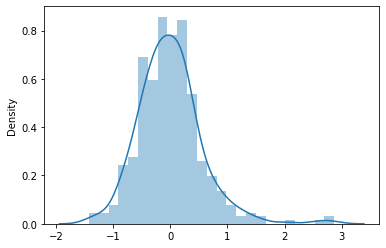

In [24]:
sns.distplot(res)
plt.show()

- the distribution is centered around zero and look normal enough

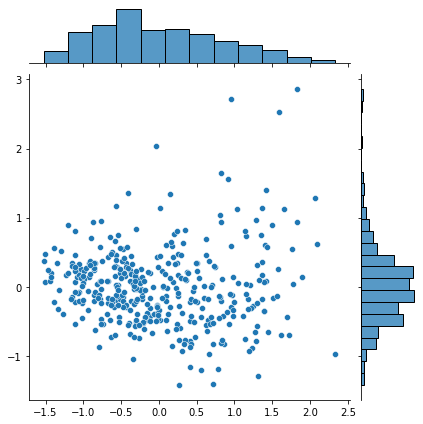

In [25]:
sns.jointplot(x=y_train_pred, y=res)
plt.show()

#### Evaluation

In [27]:
test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,-0.194638,-1.086426,0.092755,-0.575844,0.219752,1,0,0,0,0,-0.848672,1,1,0
54,1.426396,0.428907,0.092755,1.533738,0.219752,1,1,0,0,1,0.318635,0,1,0
171,0.271265,2.502291,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,1,1,0
244,-0.113779,0.098642,0.092755,-0.575844,0.219752,1,1,1,0,0,-0.848672,1,1,0
268,-0.206190,-0.081061,1.451980,-0.575844,0.219752,1,0,0,0,1,-0.848672,0,1,0


In [29]:
y_test = test_df.pop("price")

X_test = test_df

In [31]:
# removing the columns which we removed from test set also

removed_columns = ["semi-furnished"]

X_test.drop(columns=removed_columns, inplace=True)

In [32]:
# adding constant

X_test_sm = sm.add_constant(X_test)

X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,-1.086426,0.092755,-0.575844,0.219752,1,0,0,0,0,-0.848672,1,0
54,1.0,0.428907,0.092755,1.533738,0.219752,1,1,0,0,1,0.318635,0,0
171,1.0,2.502291,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,1,0
244,1.0,0.098642,0.092755,-0.575844,0.219752,1,1,1,0,0,-0.848672,1,0
268,1.0,-0.081061,1.451980,-0.575844,0.219752,1,0,0,0,1,-0.848672,0,0


In [33]:
# prediction

y_test_pred = lr_model.predict(X_test_sm)

In [34]:
# evaluation

r2_score(y_true=y_test, y_pred=y_test_pred)

0.6731013119788615

r2 on train set - 68.1 % <br>
r2 on test set  - 67.3 % <br>
This is decent performance

So, this is how to do multiple regression using statsmodels, practice more to become confident.

### <center>THE END</center>